In [345]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Information about data 

In [346]:
#read the data 
data=pd.read_csv('ipl_data.csv')
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [347]:
data.shape

(76014, 15)

In [348]:
data.columns


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [349]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [350]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data cleaning 


In [351]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=columns_to_remove,axis=1,inplace=True)
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [352]:
#After removing the columns
print(data.shape)
print(data.columns)

(76014, 9)
Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')


In [353]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [354]:
# Remove inconsistant team from bat_team and bol_team 
consistent_team=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
data=data[(data['bat_team'].isin(consistent_team)) & (data['bowl_team'].isin(consistent_team))]
print("After removing inconsistance teams:{}".format(data.shape))

After removing inconsistance teams:(53811, 9)


In [355]:
# Removing the first 5 overs
data=data[data['overs']>=5]
print("After removing first 5 overs data:{}".format(data.shape))

After removing first 5 overs data:(40108, 9)


# Data preprocess

In [356]:
# Convert 'date' column from string to datetime format 
data['date']=data['date'].apply(lambda x:datetime.strptime(x, '%m/%d/%Y'))
print(type(data.iloc[0,0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


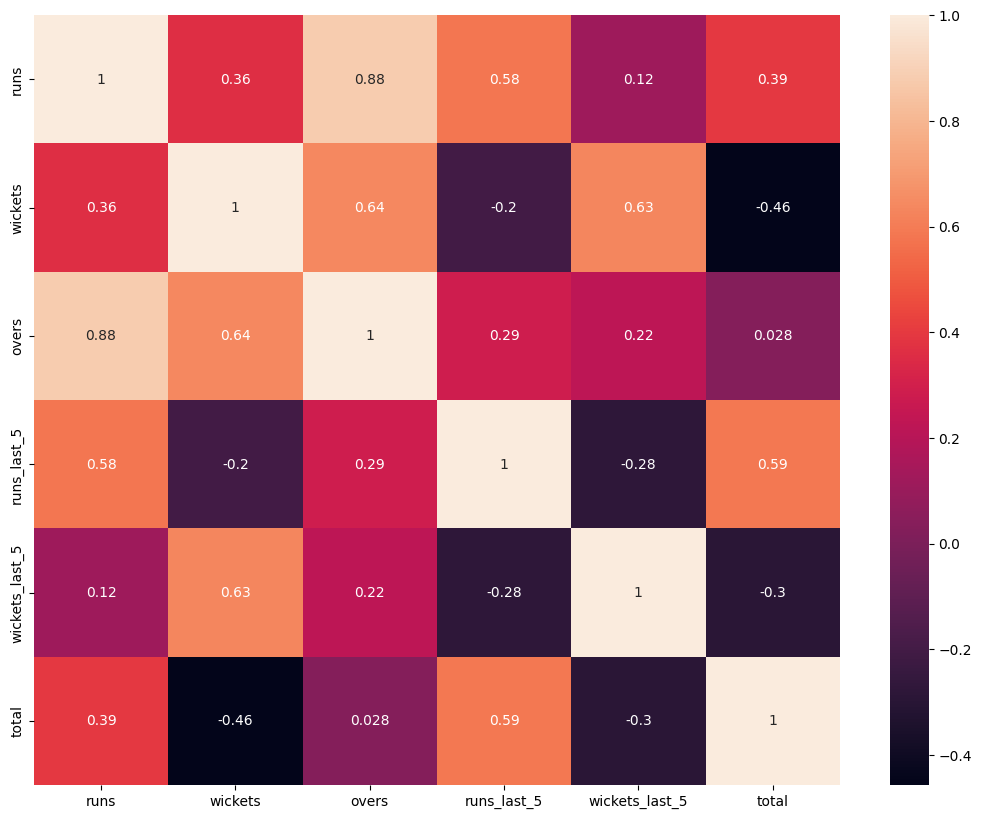

In [358]:
# Correlation matrix and plotting heatmap
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns=['runs','wickets','overs','runs_last_5','wickets_last_5','total']
selected_data=data[selected_columns]
corr_matrix = selected_data.corr()
top_corr_features = corr_matrix.index


plt.figure(figsize=(13,10))
g = sns.heatmap(data=selected_data[top_corr_features].corr(), annot=True)

In [359]:
# Applying OneHotEncoding
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [360]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [361]:
# Data convertion boolan to numerical
columns_boolean=['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad']
encoded_data[columns_boolean]=encoded_data[columns_boolean].astype(int)

In [363]:
#After convertion the data
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [364]:
encoded_data.shape

(40108, 23)

In [365]:
# Re-arrange the data 
encoded_data=encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [366]:
encoded_data.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [367]:
# Devided the train test data 
X_train = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2017]

y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values



In [368]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [370]:
#check X_train
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1


In [371]:
#check X_test
X_test.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,5.5,58,1,51,1


# Model Building 

In [373]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [375]:
#sample input 
input_sample=X_train.sample(10)
input_sample

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
1644,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.6,45,3,35,3
60559,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8.2,50,2,35,1
47533,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,8.5,62,1,33,1
3755,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,15.0,97,7,34,4
34367,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,7.4,58,2,44,1
56502,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,5.3,33,1,33,1
55708,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,16.6,164,2,44,1
53005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,17.6,123,4,30,2
29170,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,17.3,141,4,49,1
6241,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,19.2,171,4,46,2


In [377]:
#predict the target value
y_pred_lr=linear_reg.predict(X_test)

In [378]:
# model evaluation result
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
print("Mean Absolure Error (MAE):{}".format(mean_absolute_error(y_test,y_pred_lr)))
print("Mean Squared Error (MAE):{}".format(mean_squared_error(y_test,y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr,squared=False))))
print("r2 score:{}".format(r2_score(y_test,y_pred_lr)))
     

Mean Absolure Error (MAE):12.12269780136339
Mean Squared Error (MAE):251.3258742361381
Root Mean Squared Error (RMSE): 3.9816153357044883
r2 score:0.7519495492252599


In [379]:
import pickle

In [380]:
#Save model at pkl file 
filename='IPL_target_runPrediction_model.pkl'
pickle.dump(linear_reg,open(filename,'wb'))